In [13]:
import numpy as np
# our code
from algos.AdaBoost import AdaBoost
from algos.knn import Knn
from data.utils import orgenize_data
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

#### Adaptive Boosting

In [2]:
# avraging results over 50 runs

train_data, train_labels, test_data, test_labels = orgenize_data(np.loadtxt('squares.txt'))

empirical_error_sums = np.zeros(8)
absolute_error_sums = np.zeros(8)

for run in range(50):

    adaboost = AdaBoost()
    adaboost.train(train_data, train_labels, 15)

    for num_of_rules in range(8):

        tmp = AdaBoost()
        tmp.rules = {rule : adaboost.rules[rule]  for rule in sorted(adaboost.rules, key = lambda k : adaboost.rules[k])[-1 : -num_of_rules -2 : -1]}

        empirical_error_sums[num_of_rules] +=  1 - tmp.test(train_data, train_labels)
        absolute_error_sums[num_of_rules] += 1 - tmp.test(test_data, test_labels)

empirical_error_sums /= 50
absolute_error_sums /= 50

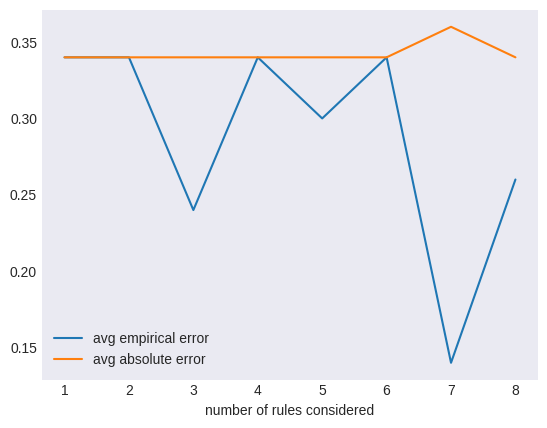

In [3]:
plt.xlabel('number of rules considered')
plt.plot(range(1, 9), empirical_error_sums)
plt.plot(range(1, 9), absolute_error_sums)
plt.legend(['avg empirical error', 'avg absolute error'], loc = 'best')
plt.show()

#### Conclusions

we observe that the consideration of the 2 least important rules left us wrose off.<p>
prior to that however the rules worked together well.

In the middle of the graph ( encouperating 4 - 6 rules) we dont observe much overfitting,<p>
since the empirical error is roughly the absolute error.

#### K Nearest Neighbours

data/haberman.csv
data/squares.txt


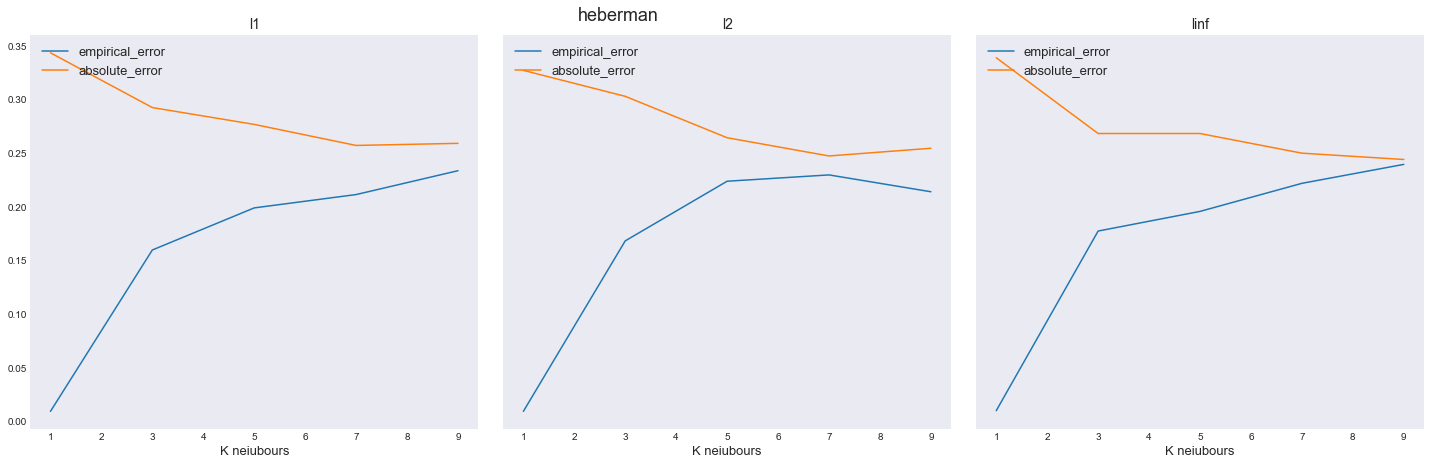

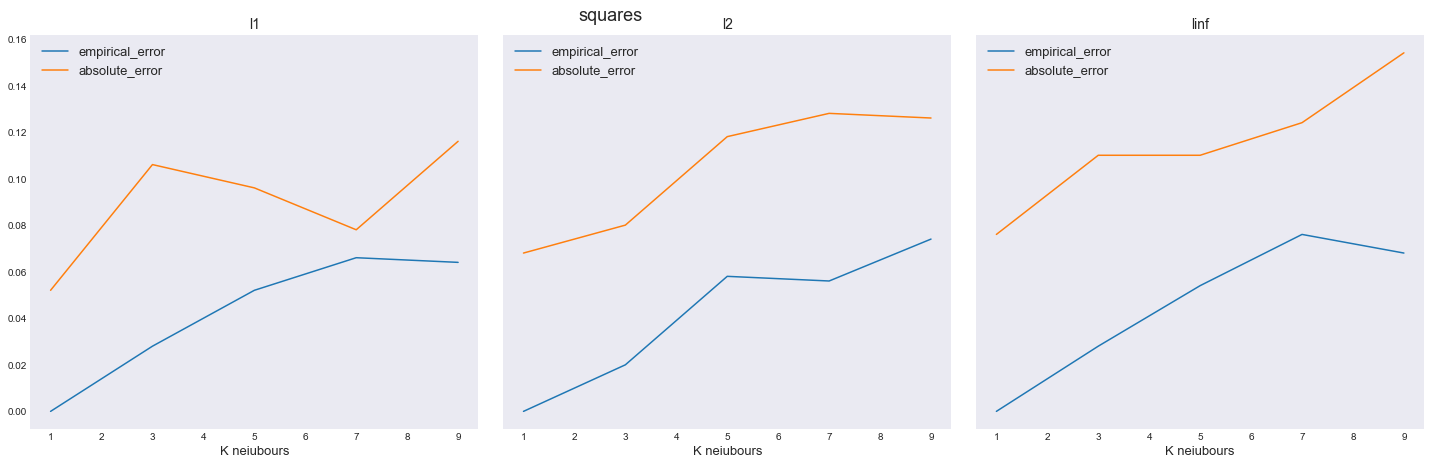

In [19]:
heberman = np.genfromtxt('data/haberman.csv', delimiter = ',')
heberman[:, -1] -= 1
squares = np.loadtxt('data/squares.txt')


KRange = range(1, 10, 2)
iterations = 10


# avraging results for different parameters over 100 random runs

for data in heberman, squares:

    fig, axes = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (20, 6))
    fig.tight_layout()
    fig.text(0.4, 1, 'heberman' if data is heberman else 'squares', fontsize = 18)

    for ind, metric in enumerate(['l1', 'l2', 'linf']):

        empirical_error_sums = np.zeros(len(KRange))
        absolute_error_sums = np.zeros(len(KRange))

        for k in KRange:

            for run in range(iterations):

                train_data, train_labels, test_data, test_labels = orgenize_data(data)

                knn = Knn(train_data, train_labels, k, metric)

                empirical_error_sums[(k - 1) // 2] += (1 - knn.test(train_data, train_labels))
                absolute_error_sums[(k - 1) // 2]  += (1 - knn.test(test_data, test_labels))

        empirical_error_sums /= iterations
        absolute_error_sums /= iterations    

        axes[ind].plot(KRange, empirical_error_sums)
        axes[ind].plot(KRange, absolute_error_sums)
        axes[ind].legend(['empirical_error', 'absolute_error'], loc = 'upper left', fontsize = 13)
        axes[ind].set_xlabel('K neiubours', fontsize = 13)
        axes[ind].set_title(metric, fontsize = 14)

    plt.show()

Conclusions:

With the heberman data set we see overfitting only when using the l2 metric and ony after we<p>
use atleast 7 neighbours to classify
<p>
As for the squares data set: we observe overfitting with all metrics around the same value for K.
although over all much lower absolute error 